<h1>Содержание<span class="tocSkip"></span></h1>
<br>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#1.-Импорт-библиотек">
                    <span class="toc-item-num">1.&nbsp;&nbsp;</span>
                    Импорт библиотек
                </a>
            </span>
        </li>
        <li style="margin-top:10px;">
            <span>
                <a href="#2.-Генераторы-данных">
                    <span class="toc-item-num">2.&nbsp;&nbsp;</span>
                    Генераторы данных
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#2.1.-Равномерное-распределение">
                            <span class="toc-item-num">2.1.&nbsp;&nbsp;</span>
                            Равномерное распределение
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#2.2.-Нормальное-распределение">
                            <span class="toc-item-num">2.2.&nbsp;&nbsp;</span>
                            Нормальное распределение
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#2.3.-Мультимодальное-распределение">
                            <span class="toc-item-num">2.3.&nbsp;&nbsp;</span>
                            Мультимодальное распределение
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li style="margin-top:10px;">
            <span>
                <a href="#3.-Метод-Парзена-Розенблатта">
                    <span class="toc-item-num">3.&nbsp;&nbsp;</span>
                    Метод Парзена-Розенблатта
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#4.-Восстановление-плотности">
                    <span class="toc-item-num">4.&nbsp;&nbsp;</span>
                    Восстановление плотности
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#5.-Оптимизация-ширины-окна-+-LOO">
                    <span class="toc-item-num">5.&nbsp;&nbsp;</span>
                    Оптимизация ширины окна + LOO
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#6.-EM-алгоритм">
                    <span class="toc-item-num">6.&nbsp;&nbsp;</span>
                    EM-алгоритм
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#7.-Общий-вывод">
                    <span class="toc-item-num">7.&nbsp;&nbsp;</span>
                    Общий вывод
                </a>
            </span>
        </li>
    </ul>
</div>

# Лабораторная работа №5: Parzen-Rozenblatt

**Задача 1:** реализовать три генератора данных на плоскости и в пространстве: равномерное распределение, нормальное распределение и мультимодальное распределение. 

**Задача 2:** реализовать метод Парзена-Розенблатта.

**Задача 3:** восстановить плотность в виде изображений.

**Задача 4:** для одного из трёх наборов сгенерированных данных применить оптимизацию ширины окна методом Leave-One-Out.

**Задача 5:** для двугорбых и более распределений применить EM-алгоритм из библиотеки `sklearn`.

**Источник данных:** сгенерированный набор точек

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 1. Импорт библиотек

Импорт необходимых библиотек:

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import LeaveOneOut
from sklearn.mixture import GaussianMixture

from typing import Mapping, Tuple

import matplotlib.pyplot as plt

from utils.plot_charts import compare_generated_data, \
                              compare_density, \
                              plot_density, \
                              plot_generated_data, \
                              plot_gaussian_mixture, \
                              plot_parzen_density_recovery

Внутрипроектный модуль `plot_charts` включает в себя следующие функции:

* `compare_generated_data` - построение двумерного статичного графика для сравнения логики построения распределений

* `compare_density` - построение двумерного статичного графика для сравнения плотностей распределений

* `plot_density` - построение двумерного статичного графика плотности распределения

* `plot_generated_data` - построение двумерного статичного графика сгенерированного распределения

* `plot_gaussian_mixture` - построение двумерного статичного графика модели смеси Гаусса мультимодального распределения

* `plot_parzen_density_recovery` - построение двумерного статичного графика распределения плотностей Парзена-Розенблатта

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 2. Генераторы данных

### 2.1. Равномерное распределение

**Непрерывное равномерное распределение** - распределение случайной вещественной величины, принимающей значения, принадлежащие некоторому промежутку конечной длины, характеризующееся тем, что плотность вероятности на этом промежутке почти всюду постоянна.

Случайная величина имеет непрерывное равномерное распределение на отрезке $ [a, b] $, где $ a, b \in \mathbb{R} $, если её плотность $ f_X(x) $ имеет вид:

$$ f_X(x) = \left\{
    \begin{array}\\
        \frac {1}{b - a}, & x \in [a, b] \\
        0, & x \notin [a, b]
    \end{array}
\right. $$

То есть $ X \sim U[a, b] $.

Задание функции равномерного распределения:

In [2]:
def uniform_distribution(a: float, b: float) -> float:
    x = np.random.random()
    
    return a + (b - a) * x

Задание функции, генерирующей заданное число экземляров распределения:

In [3]:
def uniform_distribution_generator(a: float, 
                                   b: float,
                                   total: int) -> np.array:
    
    return np.array([uniform_distribution(a, b) for _ in range(total)])

Сохранение сгенерированных данных:

In [4]:
uniform_data = uniform_distribution_generator(0, 1, 1000)

Выведение на экран графика сравнения поведения сгенерированных данных относительно метода библиотеки `numpy`:

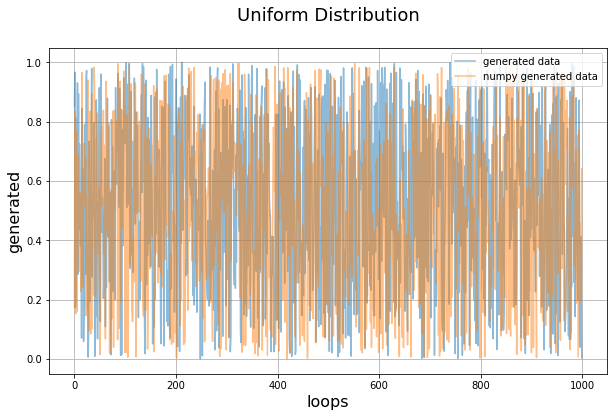

In [5]:
compare_generated_data(uniform_data, np.random.uniform(0, 1, 1000), 'Uniform Distribution')

Выведение на экран графика сравнения поведения плотностей сгенерированных данных относительно метода библиотеки `numpy`:

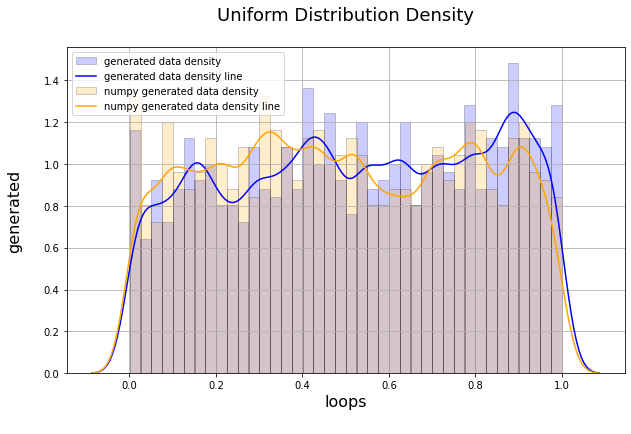

In [6]:
compare_density(uniform_data, np.random.uniform(0, 1, 1000), 'Uniform Distribution Density')

<div style="height: 2px; background-color: blue; margin: 10px 0; opacity: 0.2;"></div>

### 2.2. Нормальное распределение

**Нормальное распределение (распределением Гаусса)** - непрерывное распределение вероятностей с пиком в центре и симметричными боковыми сторонами, которое в одномерном случае задаётся функцией плотности вероятности, совпадающей с функцией Гаусса:

$$ f(x) = \frac {1}{\sigma \sqrt{2 \pi}} e^{- \frac {1}{2} (\frac {x - \mu}{\sigma})^2} = \frac {1}{\sigma} \varphi \Big( \frac {x - \mu}{\sigma} \Big) $$

Где:

* $ \mu $ - математическое ожидание (среднее значение), медиана и мода распределения
* $ \sigma $ - среднеквадратичное отклонение
* $ \sigma^2 $ - дисперсия распределения
* $ \varphi (x) = \frac {1}{\sqrt {2 \pi}} e^{- \frac {1}{2} x^2} $ - стандартное отклонение

Задание функции Гаусса:

In [7]:
def gauss_func(x: np.array, mu: float = 0, sigma: float = 1) -> np.array:
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.e ** (-0.5 * ((x - mu) / sigma) ** 2)

Задание функции распределения:

In [8]:
def normal_distribution(mu: float, sigma: float) -> float:
    n = np.random.randint(1, 20)
    x = 0
    for i in range(n):
         x += np.random.uniform()
            
    return sigma * np.sqrt(12 / n) * (x - n / 2) + mu

Задание функции, генерирующей заданное число экземляров распределения:

In [9]:
def normal_distribution_generator(mu: float, sigma: float, total: int) -> np.array:
    return np.array([normal_distribution(mu, sigma) for _ in range(total)])

Сохранение сгенерированных данных:

In [10]:
normal_data = normal_distribution_generator(0, 1, 1000)

Выведение на экран графика сравнения поведения сгенерированных данных относительно метода библиотеки `numpy`:

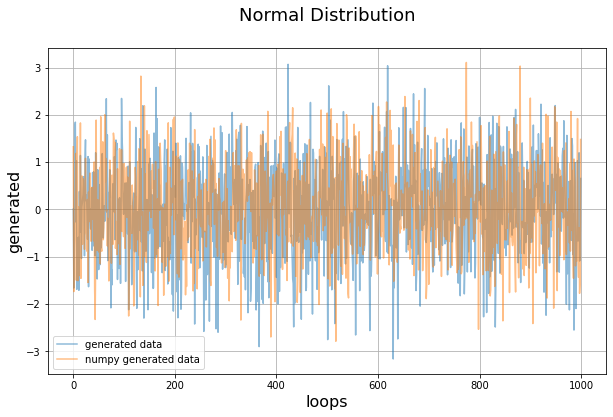

In [11]:
compare_generated_data(normal_data, np.random.normal(0, 1, 1000), 'Normal Distribution')

Выведение на экран графика сравнения поведения плотностей сгенерированных данных относительно метода библиотеки `numpy`:

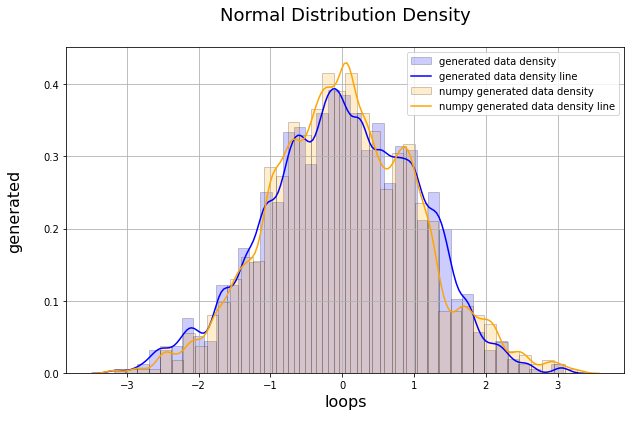

In [12]:
compare_density(normal_data, np.random.normal(0, 1, 1000), 'Normal Distribution Density')

Выведение на экран графика нормального распределения Гаусса:

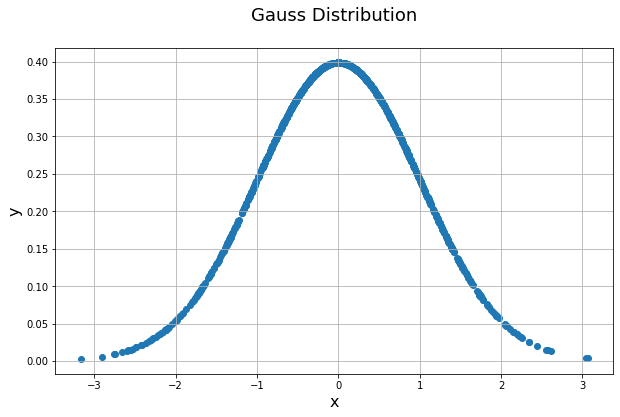

In [13]:
plot_generated_data(normal_data, gauss_func(normal_data), 'Gauss Distribution')

<div style="height: 2px; background-color: blue; margin: 10px 0; opacity: 0.2;"></div>

### 2.3. Мультимодальное распределение

**Мультимодальное распределение** - распределение вероятностей с более чем одним режимом. Они отображаются в виде отдельных пиков (локальных максимумов) в функции плотности вероятности, образованные с помощью категориальных, непрерывных и дискретных данных.

Задание функции распределения:

In [14]:
def multimodal_distribution_two_peaks(mu_sigma_1: Tuple, mu_sigma_2: Tuple, total: int, p: float) -> Tuple:    
    normal_1 = normal_distribution_generator(*mu_sigma_1, int(total * p))
    normal_2 = normal_distribution_generator(*mu_sigma_2, int(total * (1 - p)))
        
    return np.hstack((normal_1, normal_2))

Сохранение сгенерированных данных:

In [15]:
multimodal_data = multimodal_distribution_two_peaks((20, 4), (40, 5), 1000, 0.3)

Выведение на экран графика сравнения поведения плотностей сгенерированных данных:

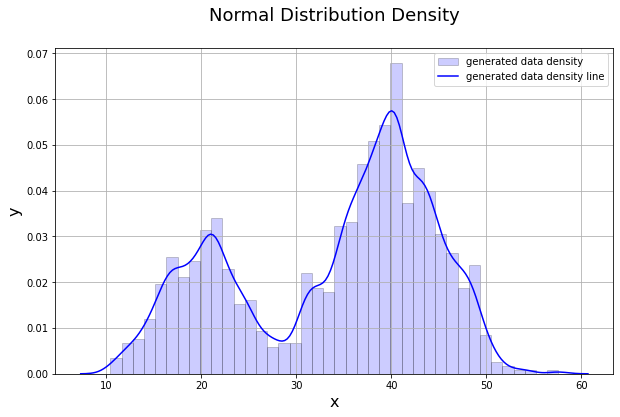

In [16]:
plot_density(multimodal_data, 'Normal Distribution Density')

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 3. Метод Парзена-Розенблатта

**Метод Парзена-Розенблатта** (ядерная оценка плотности (ЯОП), Kernel Density Estimation (KDE)) - непараметрический способ оценки плотности случайной величины, который является задачей сглаживания данных, когда делается заключение о совокупности, основываясь на конечных выборках данных. 

>**Непараметрическая статистика** - раздел статистики, который не основан исключительно на параметризованных семействах вероятностных распределений (математическое ожидание, дисперсия)

Пусть $ (x_1, x_2, ..., x_n) $ - одномерная выборка независимых одинаково распределённых величин, извлечённых из некоторого распределения с неизвестной плотностью $ f $. 

Ядерный оценщик плотности этой выборки:

$$ \hat f_h(x) = \frac {1}{n} \sum_{i = 1}^n K_h (x - x_i) = \frac {1}{nh} \sum_{i = 1}^n K \Big( \frac {x - x_i}{h} \Big) $$

Где:

* $ K $ - ядро (неотрицательная функция)
* $ h > 0 $ - ширина плосы (сглаживающий параметр) - максимально маленькое значение
* $ K_h(x) = \frac {1}{h} K \big( \frac {x}{h} \big) $ - взвешенное ядро

Функция ядра Гаусса: 

$$ K(x) = \frac {1}{\sqrt {2 \pi}} e^{-x^2} $$

Задание функции взвешенного ядра Гаусса:

In [17]:
def kernel_gauss(x: np.array) -> np.array:    
    return (1 / np.sqrt(2 * np.pi)) * np.e * -(x ** 2)

Функция ядра Лапласа:

$$ K(x) = \frac {1}{2} e^{-|x|} $$

Задание функции взвешенного ядра Лапласа:

In [18]:
def kernel_laplas(x: np.array) -> np.array:   
    return 0.5 * np.e ** - (np.abs(x))

Функция ядра Коши:

$$ K(x) = \frac {1}{\pi (1 + x^2)} $$

Задание функции взвешенного ядра Коши:

In [19]:
def kernel_koshi(x: np.array) -> np.array:    
    return (1 / np.pi) * (1 + x ** 2)

Задание функции Парзена-Розенблатта:

In [20]:
def parzen_rozenblatt(x: np.array, data: np.array, kernel: Mapping, h: float) -> np.array:
    return np.array(sum([kernel((x - x_i) / h) for x_i in data]) / len(x) * h)

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 4. Восстановление плотности

Проекционные методы основаны на разложении искомой плотности в ряд по ортогональной системе функций относительно фиксированной реперной плотности.

>**Реперная плотность** состоит из реперных точек, на которых основывается шкала измерений.

**Равномерное распределение**

Выведение на экран графика распределния плотности равномерного распределения по ядру Гаусса:

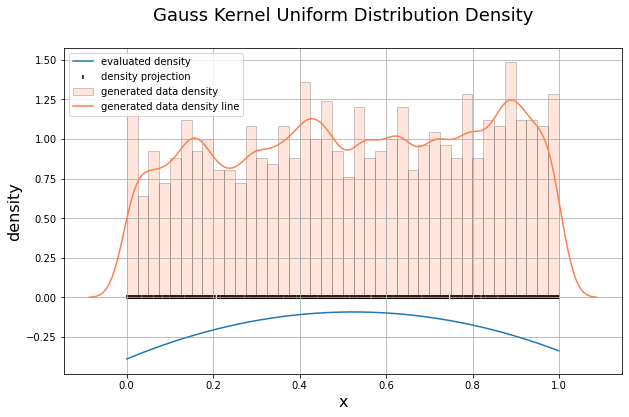

In [21]:
plot_parzen_density_recovery(uniform_data, parzen_rozenblatt, kernel_gauss, 
                             'Gauss Kernel Uniform Distribution')

Выведение на экран графика распределния плотности равномерного распределения по ядру Лапласа:

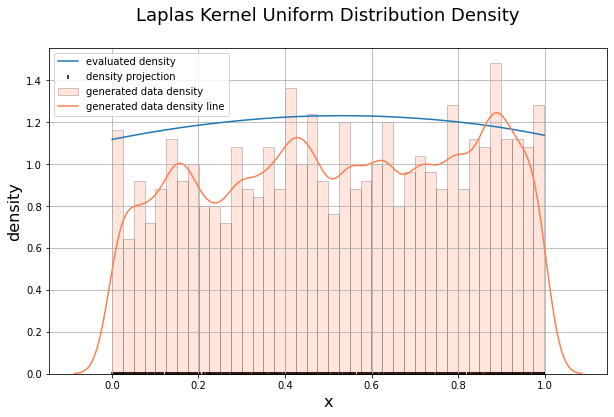

In [22]:
plot_parzen_density_recovery(uniform_data, parzen_rozenblatt, kernel_laplas, 
                             'Laplas Kernel Uniform Distribution', 2.7)

Выведение на экран графика распределния плотности равномерного распределения по ядру Коши:

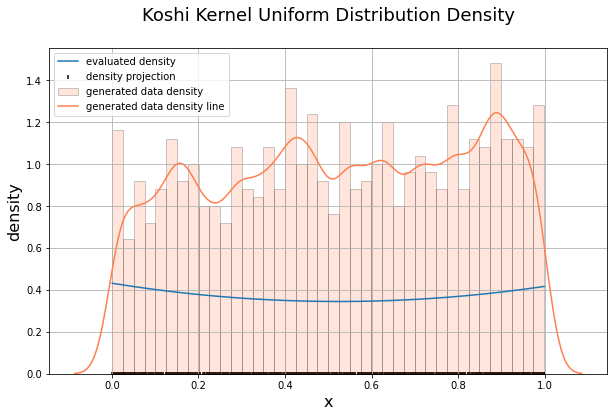

In [23]:
plot_parzen_density_recovery(uniform_data, parzen_rozenblatt, kernel_koshi, 
                             'Koshi Kernel Uniform Distribution')

>Для оценки плотности равномерного распределения подходит ядро Лапласа.

<div style="height: 2px; background-color: blue; margin: 10px 0; opacity: 0.2;"></div>

**Нормальное распределение**

Выведение на экран графика распределния плотности равномерного распределения по ядру Гаусса:

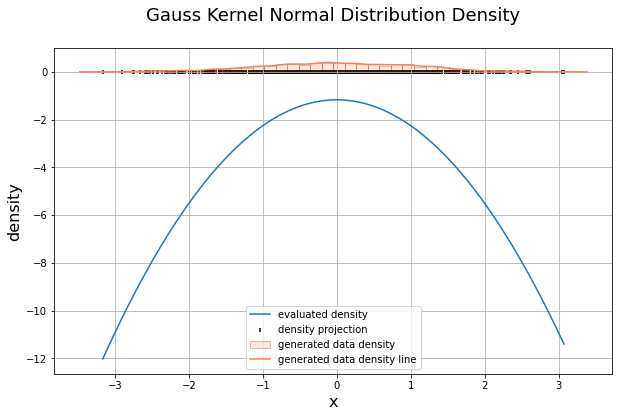

In [24]:
plot_parzen_density_recovery(normal_data, parzen_rozenblatt, kernel_gauss, 
                             'Gauss Kernel Normal Distribution')

Выведение на экран графика распределния плотности равномерного распределения по ядру Лапласа:

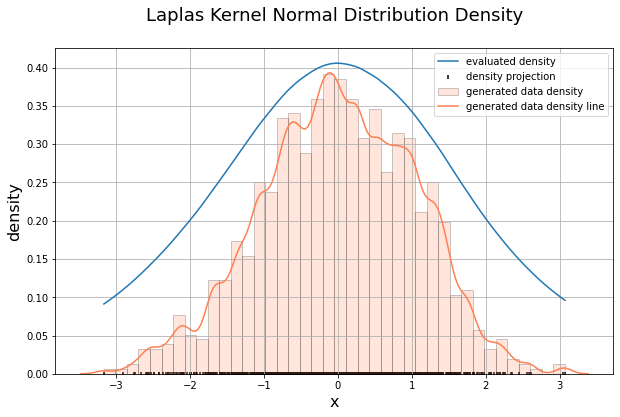

In [25]:
plot_parzen_density_recovery(normal_data, parzen_rozenblatt, kernel_laplas, 
                             'Laplas Kernel Normal Distribution', 1.37)

Выведение на экран графика распределния плотности равномерного распределения по ядру Коши:

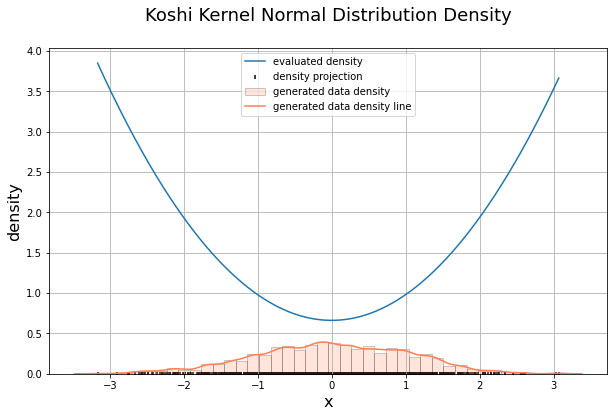

In [26]:
plot_parzen_density_recovery(normal_data, parzen_rozenblatt, kernel_koshi, 
                             'Koshi Kernel Normal Distribution')

>Для оценки плотности нормального распределения подходит ядро Лапласа.

<div style="height: 2px; background-color: blue; margin: 10px 0; opacity: 0.2;"></div>

**Мультимодальное распределение**

Выведение на экран графика распределния плотности равномерного распределения по ядру Гаусса:

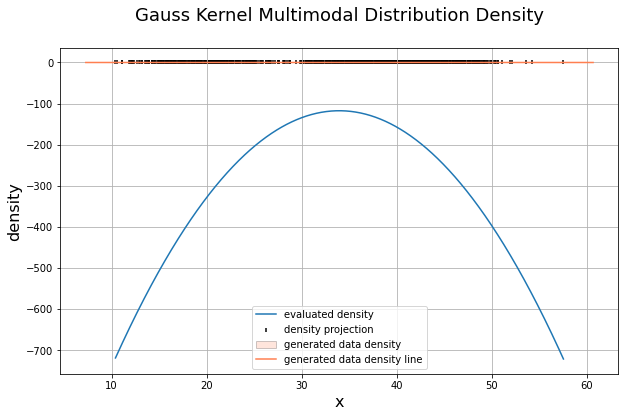

In [27]:
plot_parzen_density_recovery(multimodal_data, parzen_rozenblatt, kernel_gauss, 
                             'Gauss Kernel Multimodal Distribution')

Выведение на экран графика распределния плотности равномерного распределения по ядру Лапласа:

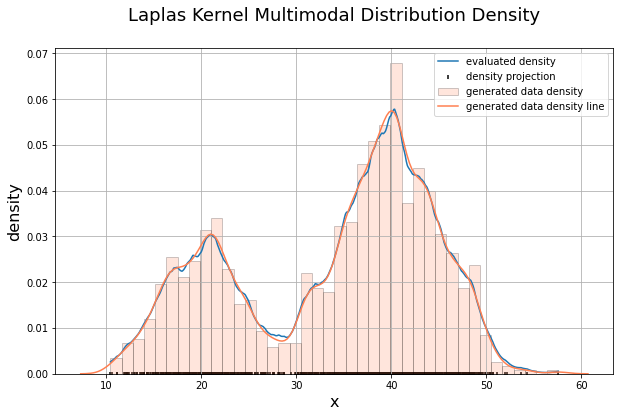

In [28]:
plot_parzen_density_recovery(multimodal_data, parzen_rozenblatt, kernel_laplas, 
                             'Laplas Kernel Multimodal Distribution')

Выведение на экран графика распределния плотности равномерного распределения по ядру Коши:

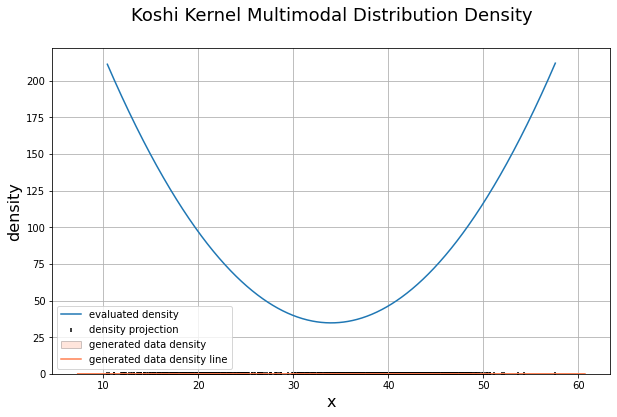

In [29]:
plot_parzen_density_recovery(multimodal_data, parzen_rozenblatt, kernel_koshi, 
                             'Koshi Kernel Multimodal Distribution')

>Для оценки плотности мультимодального распределения подходит ядро Лапласа.

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 5. Оптимизация ширины окна + LOO

**Метод парзеновского окна** - метод байесовской классификации, основанный на непараметрическом восстановлении плотности по имеющейся выборке.

**Leave-one-out (LOO)** - частным случай метода k-Fold, в котором каждый фолд состоит ровно из одного семпла.

>**K-Fold** делит семплы на группы одинакового размера, называемые фолдами (в эквивалентах метода LOO). На основе фолдов строится предсказание, а оставшиеся идут на тестирование.

Метод полезен в случае малого количества данных, максимальное количество которых необходимо для обучения модели: валидация на каждой итерации требует только один семпл. А поскольку число итераций напрямую влияет на число семплов в данных, метод неприменим для средних и больших задач.

Принцип работы: из всей выборки поочередно убирается по одному вектору наблюдений, а обучение происходит каждый раз на оставшейся выборке. В итоге получается множество разных моделей:

$$ a_1(x), a_2(x), ..., a_n(x) $$

На основании которых формируется общая модель, которая будет обладать лучшими обобщающими способностями:

$$ a(x) = F(a_1, a_2, ..., a_n) $$

Задание функции, вычисляющей MSE по принципу LOO:

In [30]:
def leave_one_out(data: np.array, kernel: Mapping, h: float) -> float:
    x = np.linspace(data.min(), data.max(), len(data))
    bins_parzen = []
    
    for i in range(LeaveOneOut().get_n_splits(data)):
        n, bins, patches = plt.hist(parzen_rozenblatt(x[i:], data[i:], kernel, h), density=True)
        bins_parzen.append(bins.mean())
        plt.close()
    
    return np.array(bins_parzen).mean()

Задание функции, вычисляющей MSE в зависимости от `h`:

In [31]:
def optimize_h(data: np.array, kernel: Mapping, h_vals: np.array) -> dict:
    results = {}
    
    n, bins, patches = plt.hist(data, density=True)
    n_data = n.mean()
    plt.close()
    
    for i, h in enumerate(h_vals):
        results[h] = leave_one_out(data, kernel, h)
        print(f'...{i + 1}/{len(h_vals)} completed for {h}')
    
    best = min([key for key, value in results.items() if value >= n_data])
    
    print('\nBest h:', best)
    
    results['data'] = n_data
    
    return results, best

Сохранение полученных результатов:

In [32]:
h_optimized, best_h = optimize_h(multimodal_data, kernel_laplas, [.7, .8, .9, 1., 1.1, 1.2])

...1/6 completed for 0.7
...2/6 completed for 0.8
...3/6 completed for 0.9
...4/6 completed for 1.0
...5/6 completed for 1.1
...6/6 completed for 1.2

Best h: 0.9


Выведение полученных результатов на экран:

In [33]:
pd.DataFrame(h_optimized, [0])

,0.7,0.8,0.9,1.0,1.1,1.2,data
0,0.014605,0.018715,0.023305,0.028366,0.033894,0.039874,0.021209


Выведение на экран графика распределния плотности равномерного распределения по ядру Лапласа:

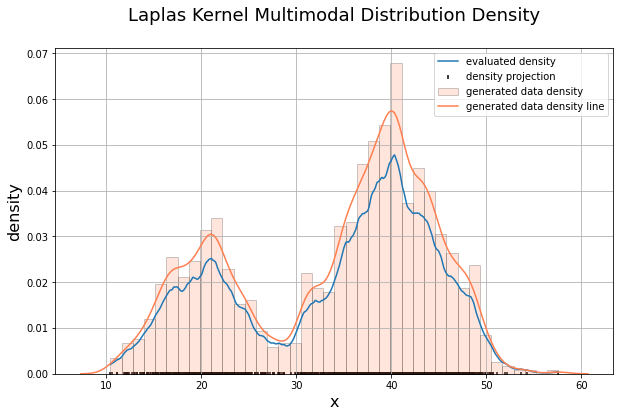

In [34]:
plot_parzen_density_recovery(multimodal_data, parzen_rozenblatt, kernel_laplas, 
                             'Laplas Kernel Multimodal Distribution', best_h)

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 6. EM-алгоритм

**EM-алгоритм** (Expectation-maximization (EM) algorithm) - алгоритм, используемый для нахождения оценок максимального правдоподобия параметров вероятностных моделей в случае, когда модель зависит от некоторых скрытых переменных. Также является общим методом нахождения оценок функции правдоподобия в моделях со скрытыми переменными, который из смеси распределений позволяет строить (приближать) сложные вероятностные распределения.

EM-алгоритм в задачах кластеризации используется как итеративный алгоритм, который на каждой итерации осуществляет два шага:

1. На E-шаге (expectation) вычисляется ожидаемое значение функции правдоподобия, при этом скрытые переменные рассматриваются как наблюдаемые. 

2. На M-шаге (maximization) вычисляется оценка максимального правдоподобия, таким образом увеличивается ожидаемое правдоподобие, вычисляемое на E-шаге. Затем это значение используется для E-шага на следующей итерации. 

Алгоритм выполняется до сходимости.

Оценка плотности распределения модели `GaussianMixture` из библиотеки `sklearn` основана на EM-алгоритме.

**Модель смеси Гаусса** - вероятностная модель, которая предполагает, что все точки данных генерируются из смеси конечного числа распределений Гаусса с неизвестными параметрами (своего рода, обобщение кластеризации k-средних для включения информации о ковариационной структуре данных, а также о центрах скрытых гауссиан).

Сохранение сгенерированных данных:

In [35]:
multimodal_data = multimodal_distribution_two_peaks((20, 4), (40, 5), 1000, 0.3)

Преобразование массива:

In [36]:
multimodal_data_reshaped = np.reshape(multimodal_data, (len(multimodal_data), 1))

Обучение модели:

In [37]:
model = GaussianMixture(n_components=2, covariance_type='tied')

Оценка параметров модели с помощью EM-алгоритма:

In [38]:
gaussian_mixture = model.fit(multimodal_data_reshaped)

Выведение на экран информации о результатах работы смеси Гаусса:

In [39]:
print('Среднее значение каждой смеси:', *gaussian_mixture.means_)
print('Достигнута сходимость:', gaussian_mixture.converged_)
print('Число шагов EM-алгоритма:', gaussian_mixture.n_iter_)

Среднее значение каждой смеси: [40.04355424] [20.37006705]
Достигнута сходимость: True
Число шагов EM-алгоритма: 2


Сохранение распределения значений по оси `x` на основании сгенерированных данных:

In [40]:
x = np.linspace(multimodal_data.min(), multimodal_data.max(), len(multimodal_data))

Преобразование массива:

In [41]:
x_reshaped = np.reshape(x, (len(x), 1))

Оценка плотности компонентов каждого семпла:

In [42]:
gaussian_mixture_prediction = gaussian_mixture.predict_proba(x_reshaped)

Выведение на экран графика соотношения плотностей модели смеси Гаусса:

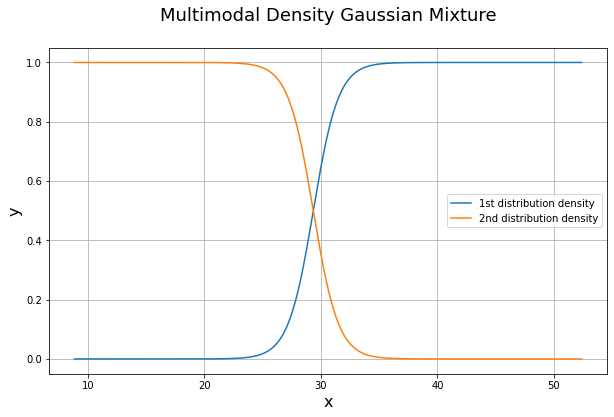

In [43]:
plot_gaussian_mixture(x, gaussian_mixture_prediction, 'Multimodal Density Gaussian Mixture')

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 7. Общий вывод

Были реализованы генераторы трёх распределений: равномерного, нормального и 2 пиков, для которых продемонстрировано поведение плотностей. 

Также был запрограммирован метод Парзена-Розенблатта, с помощью которого было продемонстрировано восстановление плотностей всех трёх распределений. Кроме того, была проведена оптимизация ширины окна метода Парзена-Розенблатта с помощью метода Leave-One-Out и продемонстрирована на распределении с двумя пиками.

<div style="text-align: center; font-size: 20px; padding: 15px 0;">
    <a href="#Содержание" data-toc-modified-id="Содержание" style="text-decoration: none; color: #296eaa; border: 2px dashed #296eaa; opacity: 0.8; border-radius: 3px; padding: 10px 80px;">
        Наверх к содержанию ↑
    </a>
</div>